In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('/kaggle/input/students-performance-in-exams/StudentsPerformance.csv')

In [3]:
data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [4]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
data.shape

(1000, 8)

In [6]:
data.columns.values

array(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'], dtype=object)

# Univariate Analysis

In [7]:
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [8]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


We can see that the math score, reading score and writing score data are very similar to each other.

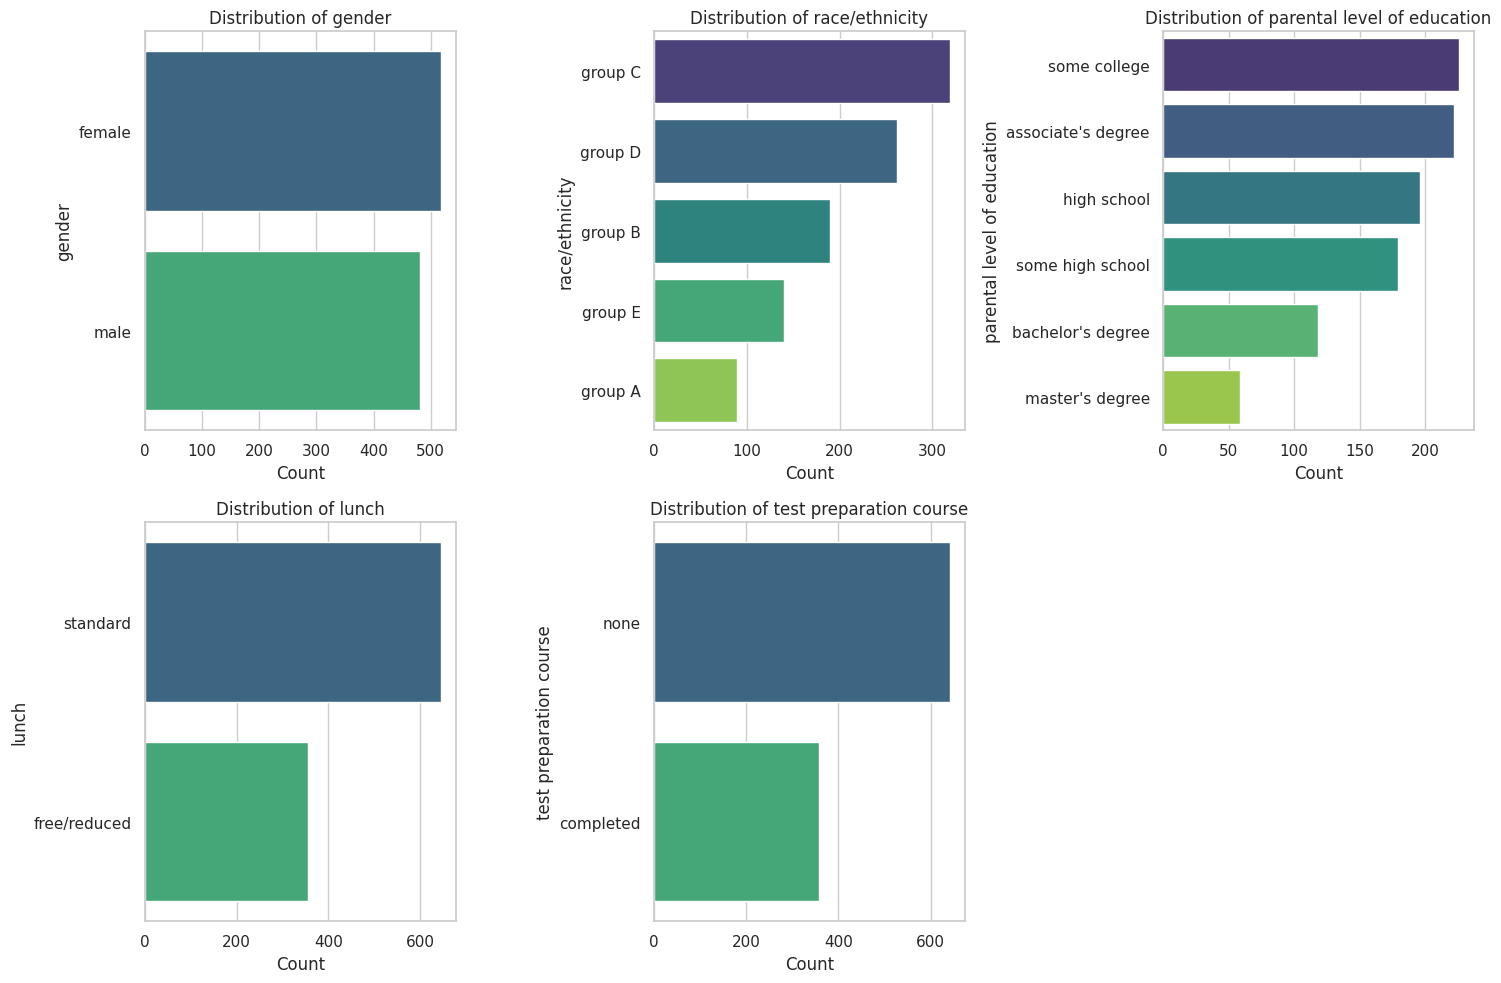

In [9]:
# Set style for seaborn
sns.set(style='whitegrid')

# Plot categorical distributions
categorical_columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
plt.figure(figsize=(15, 10))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(y=data[col], order=data[col].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


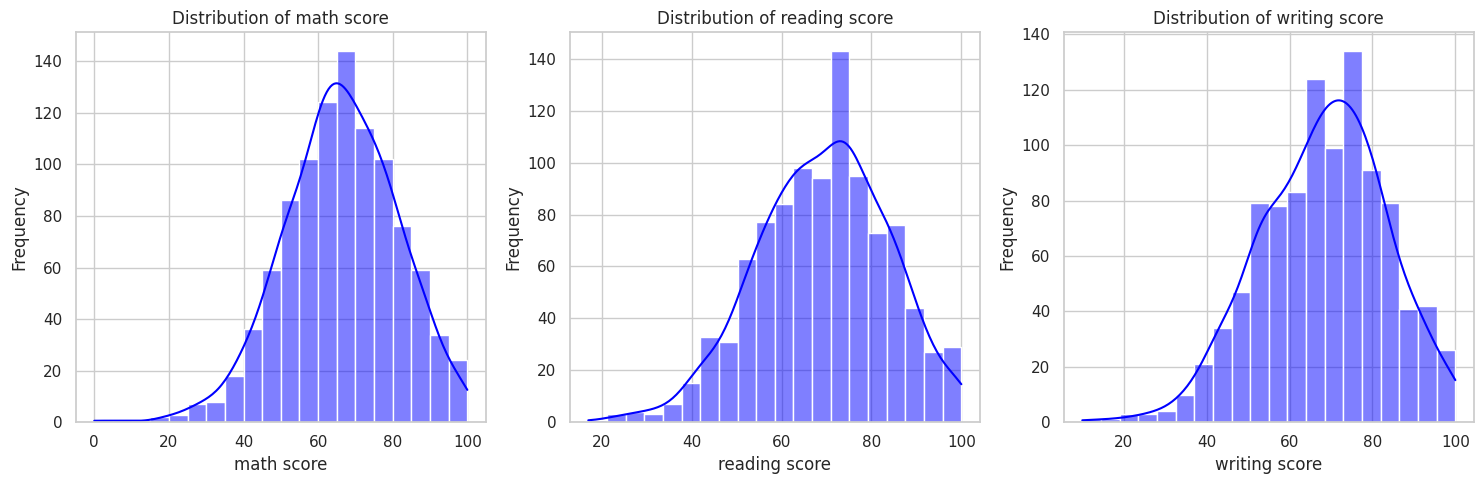

In [10]:
# Plot numerical distributions
numerical_columns = ['math score', 'reading score', 'writing score']
plt.figure(figsize=(15, 5))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[col], kde=True, bins=20, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

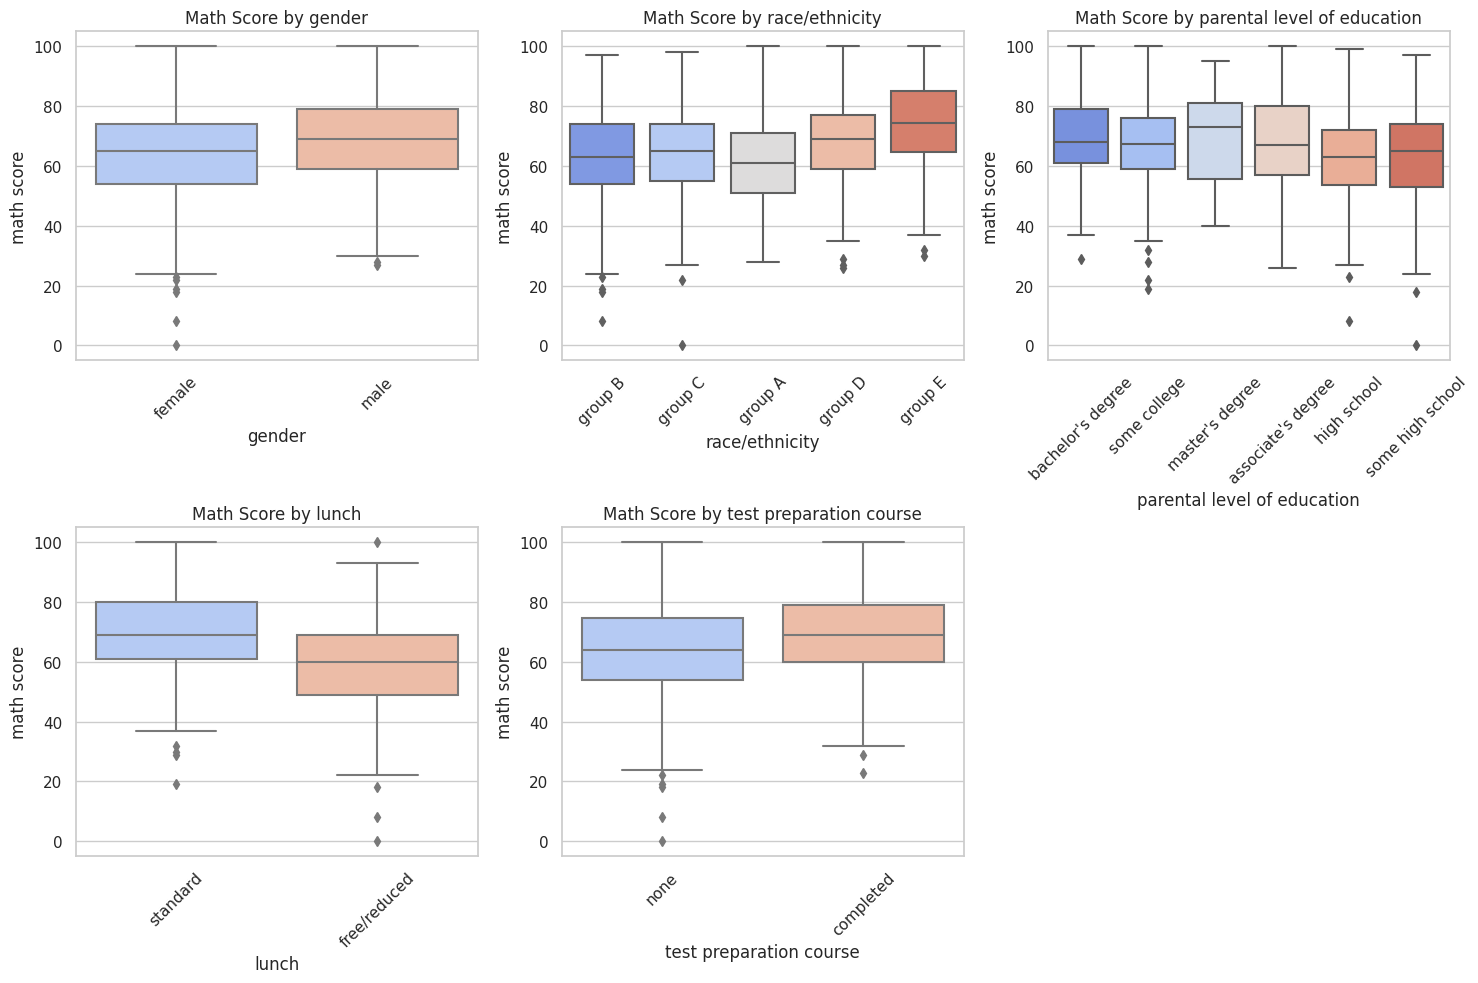

In [11]:
# Box plots to analyze score distribution by category
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=data[col], y=data['math score'], palette='coolwarm')
    plt.xticks(rotation=45)
    plt.title(f'Math Score by {col}')

plt.tight_layout()
plt.show()

### * **males** have better maths score, with fewer outliers

### * **standard lunch** students perform better

### * **test preparation** have better maths score, with fewer outliers

### * **master's degree** of parental level education stands out exceptionally amongst others

### * **group E** students have relatively higher math scores

# Multivariate Analysis

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


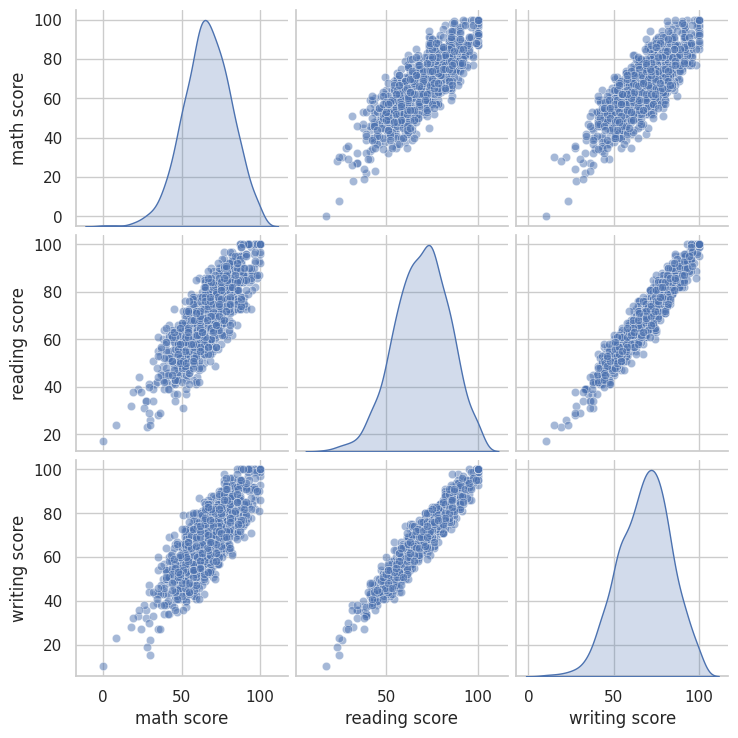

In [12]:
# Pair plot to see relationships between numerical scores
sns.pairplot(data[numerical_columns], diag_kind='kde', plot_kws={'alpha': 0.5})
plt.show()

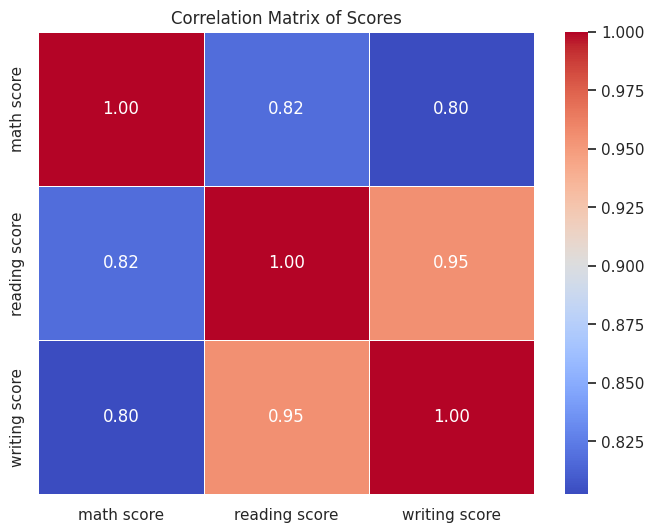

In [13]:
# Correlation matrix
plt.figure(figsize=(8, 6))
correlation_matrix = data[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Scores')
plt.show()

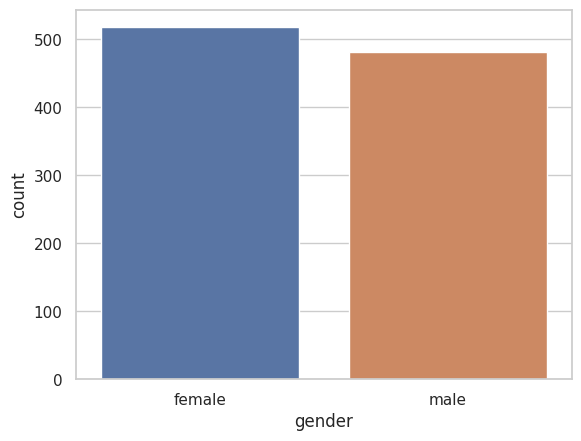

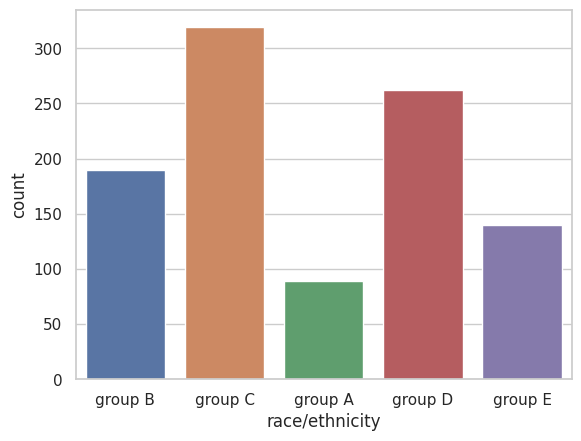

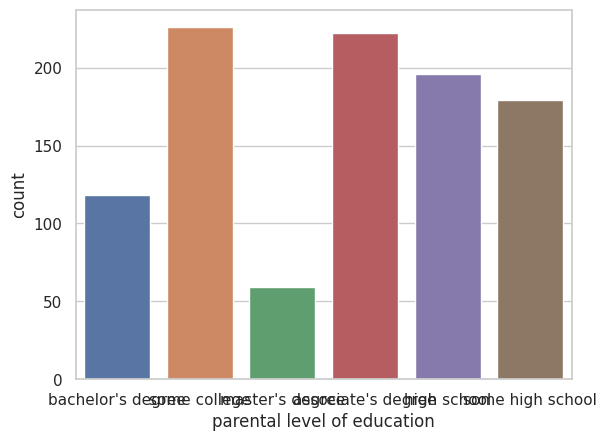

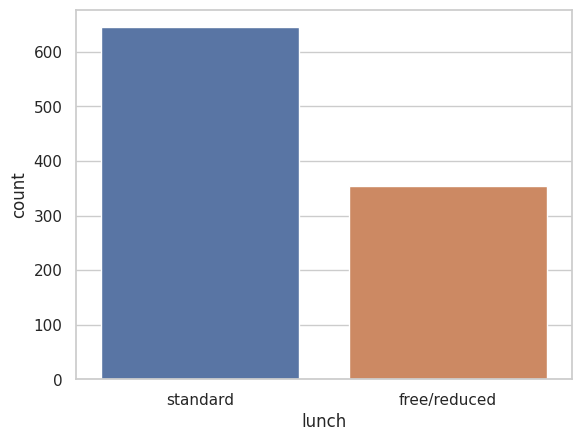

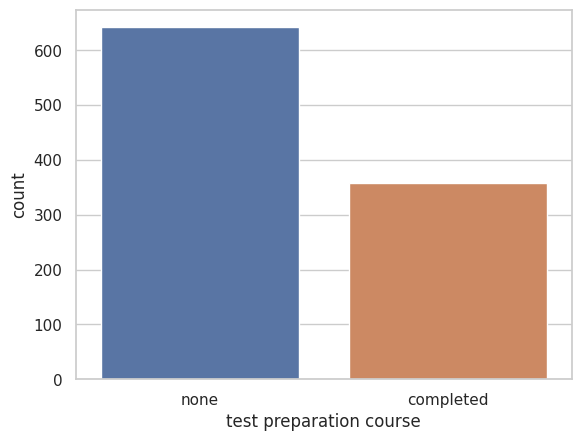

In [14]:
for i, predictor in enumerate(data.drop(columns = ["math score", "reading score", "writing score"])):
    plt.figure(i)
    sns.countplot(data = data, x=predictor)

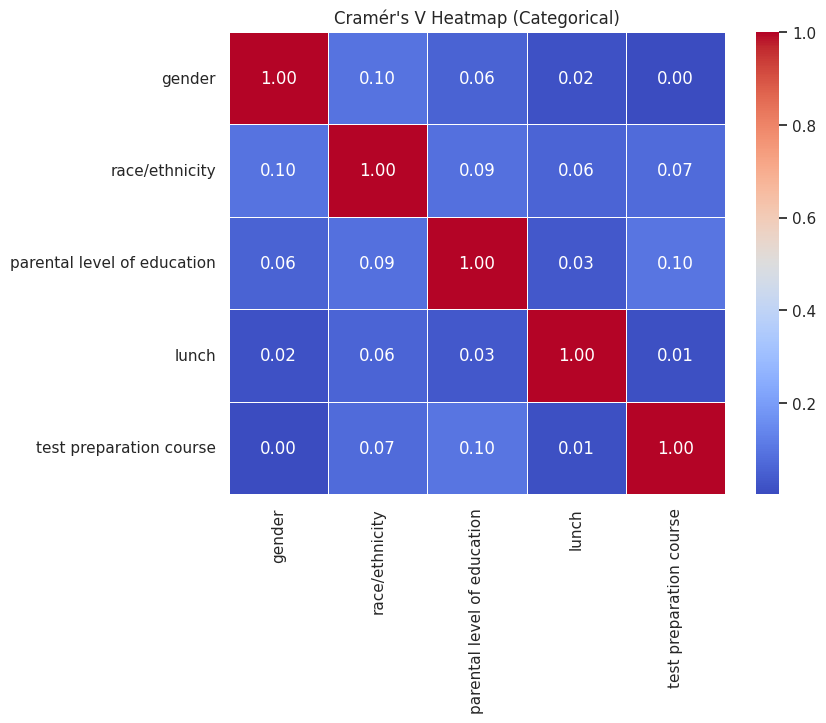

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

### 🔹 HEATMAP FOR CATEGORICAL COLUMNS (Cramér's V)
def cramers_v(confusion_matrix):
    """Calculate Cramér's V statistic for categorical variables."""
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()  # Fix: Ensure it's a single integer
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1))) if (min(r, k) - 1) > 0 else 0  # Avoid division by zero

# Initialize an empty DataFrame for Cramér's V
categorical_corr = pd.DataFrame(index=categorical_columns, columns=categorical_columns, dtype=float)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        confusion_matrix = pd.crosstab(data[col1], data[col2])
        categorical_corr.loc[col1, col2] = float(cramers_v(confusion_matrix))  # Fix: Convert to float explicitly

# Convert values to float (ensures proper heatmap display)
categorical_corr = categorical_corr.astype(float)

plt.figure(figsize=(8, 6))
sns.heatmap(categorical_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Cramér's V Heatmap (Categorical)")
plt.show()


### **Conclusion**: all of the columns have very weak correlation with each other